NBA Salary cap and salary spent by every team increases each year. Salary cap is derived from basketball-related income, or BRI which includes revenue from ticket sales, TV rights, merchandise sales, championship parades held in every june and etc...We understand that are many rules and regulations that go into a players contracts. 
One of the questions we would like to answer is whether or not salary cap is an good predictor of individual player income? And we believe it's not but we would like to test our hypothesis     

In [1]:
# Dependencies
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np  
import os
from sklearn import linear_model
import statsmodels.api as sm
import pandas_profiling
from scipy.stats import pearsonr

In [2]:
#Convert sheet 1 in excel to csv
data = pd.read_excel('NBA_Salary_History.xlsx', 'Team Salaries', index_col=None)
data.to_csv('cap_output.csv', 
            encoding='utf-8', 
            float_format='%.2f')

In [3]:
#Convert sheet 2 in excel to csv
data = pd.read_excel('NBA_Salary_History.xlsx', 'Player Salaries', index_col=None)
data.to_csv('player_output.csv', 
            encoding='utf-8', 
            float_format='%.2f')

In [4]:
#Read CSVs and Combine to One Dataframe
data_one = "cap_output.csv"
data_pd = pd.read_csv(data_one)
data_df = data_pd.dropna()

#Remove unnecessary column
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]

#Specify the years using for this project
data_df = data_df[(data_df['Season'] > '1999-00') & (data_df['Season'] <= '2017-18')]

#Format salary
data_df['Salary Spent (m)'] = ['${:,.2f}'.format(x) for x in data_df['Total Salary']/1000000]
data_df['Salary Cap (m)'] = ['${:,.2f}'.format(x) for x in data_df['Salary Cap']/1000000]
data_df.head()


Season                 Team  Salary Cap  Total Salary Salary Spent (m)  \
280  2000-01        Atlanta Hawks    35500000      39297129           $39.30   
281  2000-01       Boston Celtics    35500000      51478707           $51.48   
282  2000-01    Charlotte Hornets    35500000      46441558           $46.44   
283  2000-01        Chicago Bulls    35500000      29691907           $29.69   
284  2000-01  Cleveland Cavaliers    35500000      49780549           $49.78   

    Salary Cap (m)  
280         $35.50  
281         $35.50  
282         $35.50  
283         $35.50  
284         $35.50

In [5]:
#Convert object to float
data_df['Salary Spent (m)'] = data_df['Salary Spent (m)'].str.replace('$', '').astype(float)
data_df['Salary Cap (m)'] = data_df['Salary Cap (m)'].str.replace('$', '').astype(float)

In [6]:
#Groupby season and specify the columns
team_salary = data_df.groupby(["Season"])['Salary Spent (m)', 'Salary Cap (m)'].mean().round(1)
team_salary.head()

Salary Spent (m)  Salary Cap (m)
Season                                   
2000-01              51.9            35.5
2001-02              53.7            42.5
2002-03              57.6            40.3
2003-04              57.7            43.8
2004-05              59.1            43.9

In [7]:
#Read CSVs and Combine to One Dataframe
data_two = "player_output.csv"
player_pd = pd.read_csv(data_two)
player_df = player_pd.dropna()

#Remove unnecessary column
player_df = player_df.loc[:, ~player_df.columns.str.contains('^Unnamed')]

#Specify the years using for this project
player_df = player_df[(player_df['Season'] > '1999-00') & (player_df['Season'] <= '2017-18')]
player_df.head()

Season           Team           Player    Salary
0  2017-18  Atlanta Hawks    Kent Bazemore  16910113
1  2017-18  Atlanta Hawks  Dennis Schroder  15500000
2  2017-18  Atlanta Hawks    Miles Plumlee  12500000
3  2017-18  Atlanta Hawks   Jamal Crawford  10942762
4  2017-18  Atlanta Hawks  Marco Belinelli   6306060

In [8]:
#Convert object to float
player_df['Salary'] = player_df['Salary'].str.replace('$', '').astype(float)

In [9]:
#Format salary
player_df['Avg Player Salary (m)'] = ['${:,.2f}'.format(x) for x in player_df['Salary']/1000000]
player_df.head()

Season           Team           Player      Salary Avg Player Salary (m)
0  2017-18  Atlanta Hawks    Kent Bazemore  16910113.0                $16.91
1  2017-18  Atlanta Hawks  Dennis Schroder  15500000.0                $15.50
2  2017-18  Atlanta Hawks    Miles Plumlee  12500000.0                $12.50
3  2017-18  Atlanta Hawks   Jamal Crawford  10942762.0                $10.94
4  2017-18  Atlanta Hawks  Marco Belinelli   6306060.0                 $6.31

In [10]:
#Check for objects
player_df.dtypes

Season                    object
Team                      object
Player                    object
Salary                   float64
Avg Player Salary (m)     object
dtype: object

In [11]:
#Convert object into float and groupby season and get the average salaries of all players in the respective seasons
player_df['Avg Player Salary (m)'] = player_df['Avg Player Salary (m)'].str.replace('$', '').astype(float)
player_salary = player_df.groupby(["Season"])['Avg Player Salary (m)'].mean().round(1)
player_salary.head()

Season
2000-01    3.2
2001-02    3.4
2002-03    3.6
2003-04    3.6
2004-05    3.7
Name: Avg Player Salary (m), dtype: float64

In [12]:
#Merge the two datasets
combined_df = team_salary.join(player_salary, how='outer')
combined_df

Salary Spent (m)  Salary Cap (m)  Avg Player Salary (m)
Season                                                          
2000-01              51.9            35.5                    3.2
2001-02              53.7            42.5                    3.4
2002-03              57.6            40.3                    3.6
2003-04              57.7            43.8                    3.6
2004-05              59.1            43.9                    3.7
2005-06              63.2            49.5                    3.8
2006-07              64.6            53.1                    3.7
2007-08              68.8            55.6                    4.2
2008-09              72.0            58.7                    4.6
2009-10              70.4            57.7                    4.5
2010-11              67.5            58.0                    4.3
2011-12              67.3            58.0                    4.2
2012-13              70.5            58.0                    4.2
2013-14              71.7            58.7                    3.9
2014-15              73.9            63.1                    4.0
2015-16              79.3            70.0                    4.4
2016-17              95.5            94.1                    5.6
2017-18             111.9            99.1                    5.8

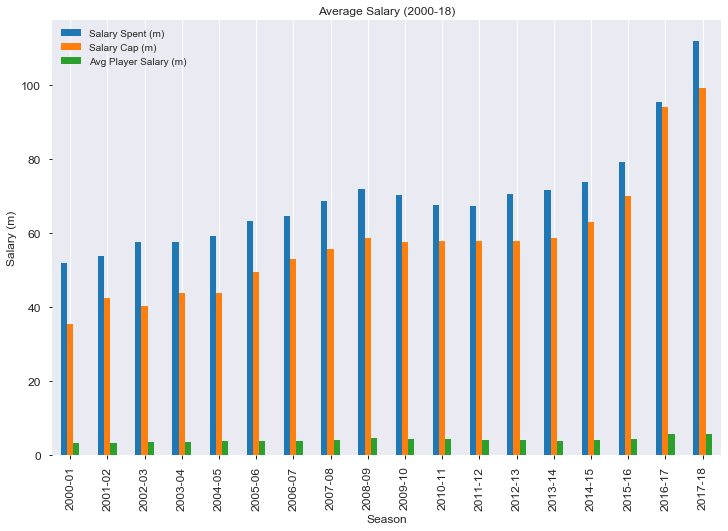

<Figure size 432x288 with 0 Axes>

In [13]:
combined_df[['Salary Spent (m)','Salary Cap (m)','Avg Player Salary (m)']].plot(kind='bar', title ="Average Salary (2000-18)", figsize=(12, 8), legend=True, fontsize=12)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Salary (m)", fontsize=12)
plt.grid(axis = 'y')
plt.show()
plt.savefig("average_salary.png")

As we can see, this chart gives us an insight into salary data of past 18 seasons. It shows Average Salary spent by all teams in that season, average salary cap and average player salary. From this bar chart, we can make an observation that while teams do end up spending more money then they were suppose too in a given season, the average player salary still remains the same and consistent with no significant change. 

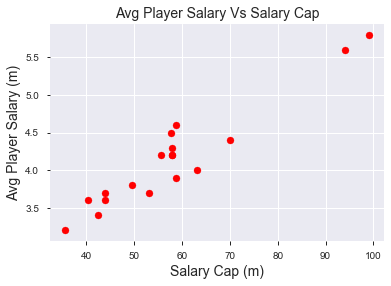

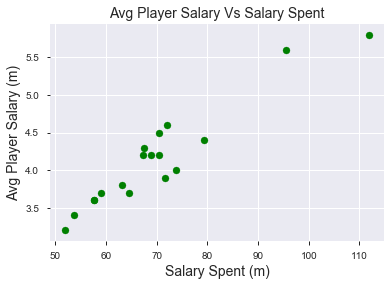

In [14]:
#Create subplots to compare independent variables against dependent variable 
plt.scatter(combined_df['Salary Cap (m)'], combined_df['Avg Player Salary (m)'], color='red')
plt.title('Avg Player Salary Vs Salary Cap', fontsize=14)
plt.xlabel('Salary Cap (m)', fontsize=14)
plt.ylabel('Avg Player Salary (m)', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(combined_df['Salary Spent (m)'], combined_df['Avg Player Salary (m)'], color='green')
plt.title('Avg Player Salary Vs Salary Spent', fontsize=14)
plt.xlabel('Salary Spent (m)', fontsize=14)
plt.ylabel('Avg Player Salary (m)', fontsize=14)
plt.grid(True)
plt.show()

Using the Multi regression model, we were able to predict the average player salary (Which is our dependent variable) based on the following two independent variables:
Average Salary Cap
Average Salary Spent by teams
Based on the model, and as we predicted we can say that there is no correlation between the salary cap, average salary spent vs average player salary
Many upcoming players and people believe as the salary cap increases, the players income increases increases by a big margin and that is actually not true and in the later slides we will see what player statistical factors are dependent on player income. 

In [15]:
#Define dependent and independent variable 
x_ind = combined_df[['Salary Cap (m)','Salary Spent (m)']] 
y_dep = combined_df['Avg Player Salary (m)']
 
#Use sklearn prediction model to predict average players salary
regression = linear_model.LinearRegression()
regression.fit(x_ind, y_dep)

print('SKLEARN PREDICTION - Average Players Salary')
print("----------------------------------------")
print('Intercept:', regression.intercept_)
print('Coefficients:', regression.coef_)
print('------------------------------------------------------------------------------------------')

#Give any number to see how the Avg players salarys change
New_salary_cap = 108 
New_salary_spent = 120
print('New Salary Cap:', New_salary_cap)
print('New Salary Spent:', New_salary_spent)
print ('Predicted Avg Player Salary: \n', regression.predict([[New_salary_cap ,New_salary_spent]]))
print('------------------------------------------------------------------------------------------')



#Statsmodel for Multi-Regression Model to get pearson r squared and p-values
x_ind = sm.add_constant(x_ind)
 
model = sm.OLS(y_dep, x_ind).fit()
predictions = model.predict(x_ind) 
 
print_model = model.summary()
print(print_model)

SKLEARN PREDICTION - Average Players Salary
----------------------------------------
Intercept: 1.5840278341366365
Coefficients: [0.02561531 0.01556408]
------------------------------------------------------------------------------------------
New Salary Cap: 108
New Salary Spent: 120
Predicted Avg Player Salary: 
 [6.21817086]
------------------------------------------------------------------------------------------
                              OLS Regression Results                             
Dep. Variable:     Avg Player Salary (m)   R-squared:                       0.911
Model:                               OLS   Adj. R-squared:                  0.900
Method:                    Least Squares   F-statistic:                     77.19
Date:                   Tue, 01 Oct 2019   Prob (F-statistic):           1.27e-08
Time:                           20:05:11   Log-Likelihood:                 3.6590
No. Observations:                     18   AIC:                            -1.318
Df Re

C:\Users\Saiteja\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Saiteja\Anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [16]:
#Optional
#Using profile report, it gives you an overview of all the data columns and provides different statistics and graphs
pd.read_csv('nba_2017_nba_players_with_salary.csv').profile_report()